In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

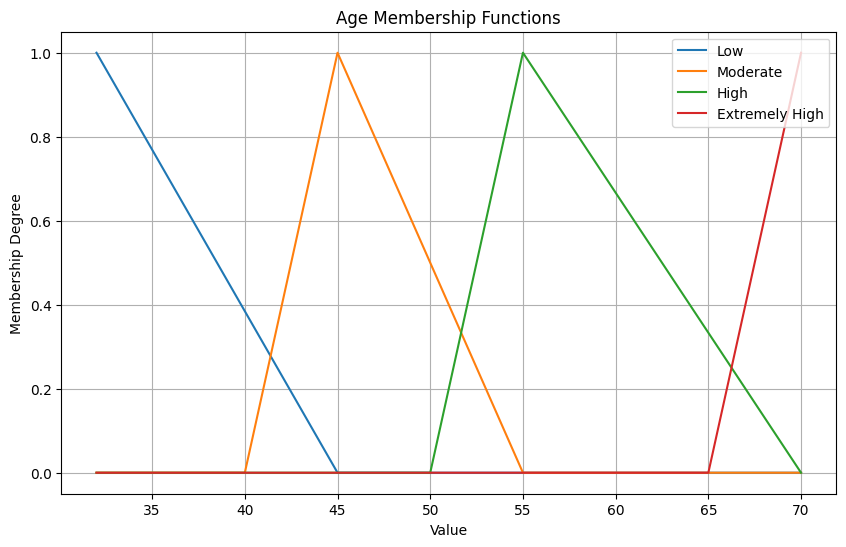

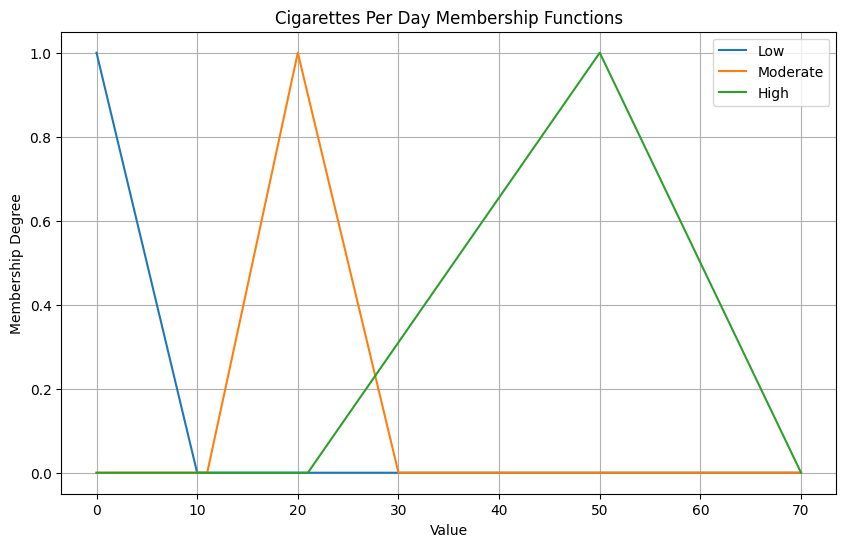

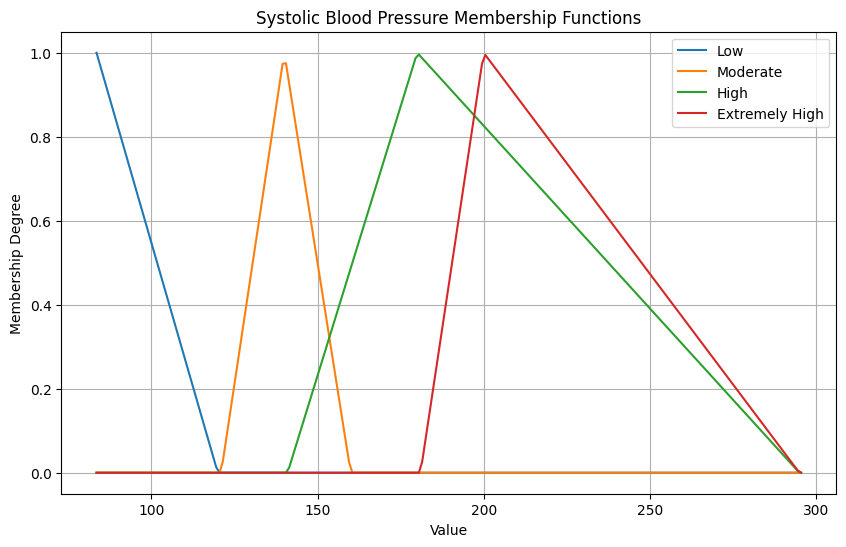

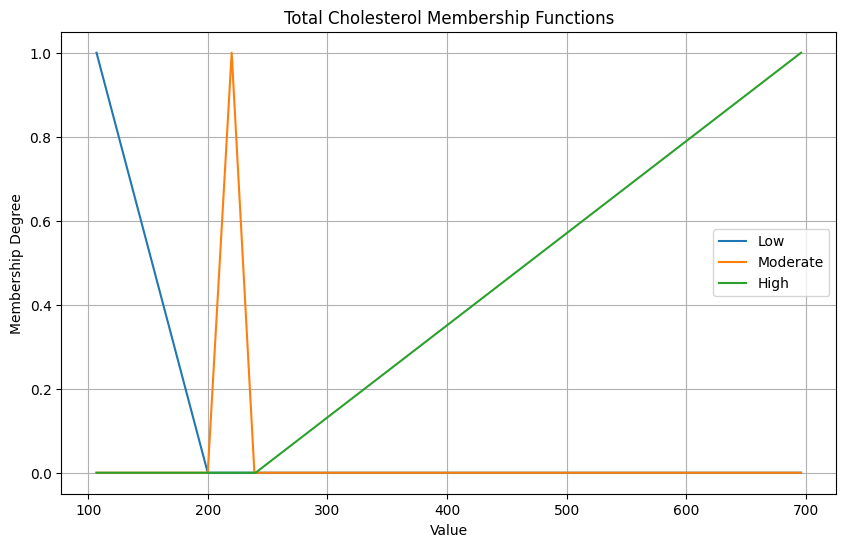

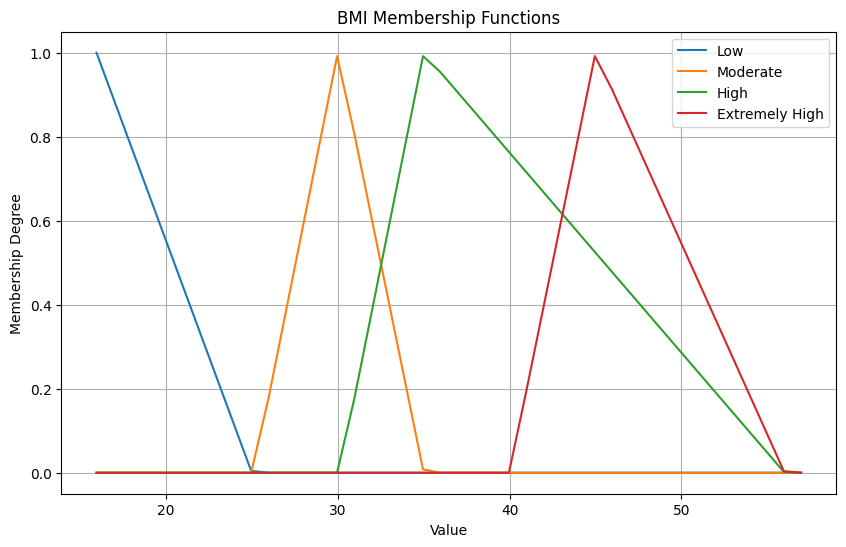

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Function to plot membership functions
def plot_membership(x, memberships, labels, title):
    plt.figure(figsize=(10, 6))
    for membership, label in zip(memberships, labels):
        plt.plot(x, membership, label=label)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Membership Degree')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Age membership functions
age = np.arange(32, 71, 1)
age_low = fuzz.trimf(age, [32, 32, 45])
age_moderate = fuzz.trimf(age, [40, 45, 55])
age_high = fuzz.trimf(age, [50, 55, 70])
age_extremely_high = fuzz.trimf(age, [65, 70, 70])

plot_membership(age, [age_low, age_moderate, age_high, age_extremely_high],
                ['Low', 'Moderate', 'High', 'Extremely High'],
                'Age Membership Functions')

# Cigarettes per day membership functions
cigs = np.arange(0, 71, 1)
cigs_low = fuzz.trimf(cigs, [0, 0, 10])
cigs_moderate = fuzz.trimf(cigs, [11, 20, 30])
cigs_high = fuzz.trimf(cigs, [21, 50, 70])

plot_membership(cigs, [cigs_low, cigs_moderate, cigs_high],
                ['Low', 'Moderate', 'High'],
                'Cigarettes Per Day Membership Functions')

# Systolic blood pressure membership functions
sysBP = np.arange(83.5, 296, 1)
sysBP_low = fuzz.trimf(sysBP, [83.5, 83.5, 120])
sysBP_moderate = fuzz.trimf(sysBP, [121, 140, 160])
sysBP_high = fuzz.trimf(sysBP, [141, 180, 295])
sysBP_extremely_high = fuzz.trimf(sysBP, [181, 200, 295])

plot_membership(sysBP, [sysBP_low, sysBP_moderate, sysBP_high, sysBP_extremely_high],
                ['Low', 'Moderate', 'High', 'Extremely High'],
                'Systolic Blood Pressure Membership Functions')

# Total cholesterol membership functions
cholesterol = np.arange(107, 697, 1)
cholesterol_low = fuzz.trimf(cholesterol, [107, 107, 200])
cholesterol_moderate = fuzz.trimf(cholesterol, [200, 220, 239])
cholesterol_high = fuzz.trimf(cholesterol, [240, 696, 696])

plot_membership(cholesterol, [cholesterol_low, cholesterol_moderate, cholesterol_high],
                ['Low', 'Moderate', 'High'],
                'Total Cholesterol Membership Functions')

# BMI membership functions
bmi = np.arange(15.96, 57, 1)
bmi_low = fuzz.trimf(bmi, [15.96, 15.96, 25])
bmi_moderate = fuzz.trimf(bmi, [25.1, 30, 35])
bmi_high = fuzz.trimf(bmi, [30.1, 35, 56])
bmi_extremely_high = fuzz.trimf(bmi, [40, 45, 56])

plot_membership(bmi, [bmi_low, bmi_moderate, bmi_high, bmi_extremely_high],
                ['Low', 'Moderate', 'High', 'Extremely High'],
                'BMI Membership Functions')

**Analysis**

In [14]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import os
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the dataset file path
file_path = os.path.join(os.getcwd(), 'fuzzy risk factors dataset.csv')

# Verify if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file was not found at the specified path: {file_path}")

# Load the dataset
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values found in the following columns:")
print(missing_values)

# Handle missing values (imputation)
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(), inplace=True)
data['totChol'].fillna(data['totChol'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)
data['sysBP'].fillna(data['sysBP'].mean(), inplace=True)

# Define the fuzzy variables
cigs_per_day = ctrl.Antecedent(np.arange(0, 101, 1), 'cigsPerDay')
tot_chol = ctrl.Antecedent(np.arange(107, 301, 1), 'totChol')
bmi = ctrl.Antecedent(np.arange(15.96, 57, 1), 'BMI')
age = ctrl.Antecedent(np.arange(32, 71, 1), 'age')
sysBP = ctrl.Antecedent(np.arange(83.5, 296, 1), 'sysBP')
susceptibility = ctrl.Consequent(np.arange(0, 101, 1), 'susceptibility')

# Define fuzzy membership functions
cigs_per_day['low'] = fuzz.trimf(cigs_per_day.universe, [0, 0, 10])
cigs_per_day['moderate'] = fuzz.trimf(cigs_per_day.universe, [11, 20, 30])
cigs_per_day['high'] = fuzz.trimf(cigs_per_day.universe, [21, 50, 70])

tot_chol['low'] = fuzz.trimf(tot_chol.universe, [107, 107, 200])
tot_chol['moderate'] = fuzz.trimf(tot_chol.universe, [200, 220, 239])
tot_chol['high'] = fuzz.trimf(tot_chol.universe, [240, 300, 300])

bmi['low'] = fuzz.trimf(bmi.universe, [15.96, 15.96, 25])
bmi['moderate'] = fuzz.trimf(bmi.universe, [25.1, 30, 35])
bmi['high'] = fuzz.trimf(bmi.universe, [30.1, 35, 56])

age['low'] = fuzz.trimf(age.universe, [32, 32, 45])
age['moderate'] = fuzz.trimf(age.universe, [40, 45, 55])
age['high'] = fuzz.trimf(age.universe, [50, 55, 70])

sysBP['low'] = fuzz.trimf(sysBP.universe, [83.5, 83.5, 120])
sysBP['moderate'] = fuzz.trimf(sysBP.universe, [121, 140, 160])
sysBP['high'] = fuzz.trimf(sysBP.universe, [141, 180, 295])

susceptibility['low'] = fuzz.trimf(susceptibility.universe, [0, 0, 50])
susceptibility['moderate'] = fuzz.trimf(susceptibility.universe, [25, 50, 75])
susceptibility['high'] = fuzz.trimf(susceptibility.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(cigs_per_day['low'] & tot_chol['low'] & bmi['low'] & age['low'] & sysBP['low'], susceptibility['low'])
rule2 = ctrl.Rule(cigs_per_day['moderate'] & tot_chol['moderate'] & bmi['moderate'] & age['moderate'] & sysBP['moderate'], susceptibility['moderate'])
rule3 = ctrl.Rule(cigs_per_day['high'] & tot_chol['high'] & bmi['high'] & age['high'] & sysBP['high'], susceptibility['high'])

# Create the control system
susceptibility_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
susceptibility_sim = ctrl.ControlSystemSimulation(susceptibility_ctrl)

# Process records and compute predictions
predictions = []
for index, row in data.iterrows():
    try:
        susceptibility_sim.input['cigsPerDay'] = row['cigsPerDay']
        susceptibility_sim.input['totChol'] = row['totChol']
        susceptibility_sim.input['BMI'] = row['BMI']
        susceptibility_sim.input['age'] = row['age']
        susceptibility_sim.input['sysBP'] = row['sysBP']
        susceptibility_sim.compute()
        predictions.append(susceptibility_sim.output['susceptibility'])
    except Exception as e:
        print(f"Error on row {index}: {e}")
        predictions.append(None)

data['Predicted Susceptibility'] = predictions

# Save predictions to an Excel file
output_dir = os.path.join(os.getcwd(), 'outputs')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'fuzzy_risk_factors_dataset.xlsx')
data.to_excel(output_path, index=False)
print(f"Predictions saved to {output_path}")


Missing values found in the following columns:
age            0
cigsPerDay    22
sysBP          0
totChol       38
BMI           14
dtype: int64
Error on row 0: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 1: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 2: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 4: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected T

C:\Users\manod\AppData\Local\Temp\ipykernel_23580\3177506226.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cigsPerDay'].fillna(data['cigsPerDay'].mean(), inplace=True)
C:\Users\manod\AppData\Local\Temp\ipykernel_23580\3177506226.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Error on row 422: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 423: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 424: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 425: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error on row 426: Crisp output cannot be calculated, likely because the system is to

In [16]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"testing csv.csv"
data = pd.read_csv(file_path)

# Preprocessing: Handle missing values
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['age'] = data['age'].fillna(data['age'].mean())
data['sysBP'] = data['sysBP'].fillna(data['sysBP'].mean())

# Define the features and target variable for Decision Tree
features = ['age', 'cigsPerDay', 'totChol', 'BMI', 'sysBP']
target = 'TenYearCHD'

X = data[features]
y = data[target]

# Split the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict probabilities for the entire dataset
data['Decision_Tree_Probability'] = decision_tree_model.predict_proba(X)[:, 1]

# Define fuzzy variables
decision_tree_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'decision_tree_output')
age = ctrl.Antecedent(np.arange(32, 71, 1), 'age')
cigs_per_day = ctrl.Antecedent(np.arange(0, 101, 1), 'cigsPerDay')
tot_chol = ctrl.Antecedent(np.arange(107, 301, 1), 'totChol')
bmi = ctrl.Antecedent(np.arange(15.96, 57, 1), 'BMI')
sysBP = ctrl.Antecedent(np.arange(83.5, 296, 1), 'sysBP')
stroke_risk = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'stroke_risk')

# Define membership functions
decision_tree_output['low'] = fuzz.trimf(decision_tree_output.universe, [0, 0, 0.3])
decision_tree_output['moderate'] = fuzz.trimf(decision_tree_output.universe, [0.3, 0.5, 0.7])
decision_tree_output['high'] = fuzz.trimf(decision_tree_output.universe, [0.7, 1, 1])

age['low'] = fuzz.trimf(age.universe, [32, 32, 45])
age['moderate'] = fuzz.trimf(age.universe, [40, 45, 55])
age['high'] = fuzz.trimf(age.universe, [50, 55, 70])

cigs_per_day['low'] = fuzz.trimf(cigs_per_day.universe, [0, 0, 10])
cigs_per_day['moderate'] = fuzz.trimf(cigs_per_day.universe, [11, 20, 30])
cigs_per_day['high'] = fuzz.trimf(cigs_per_day.universe, [21, 50, 70])

tot_chol['low'] = fuzz.trimf(tot_chol.universe, [107, 107, 200])
tot_chol['moderate'] = fuzz.trimf(tot_chol.universe, [200, 220, 239])
tot_chol['high'] = fuzz.trimf(tot_chol.universe, [240, 300, 300])

bmi['low'] = fuzz.trimf(bmi.universe, [15.96, 15.96, 25])
bmi['moderate'] = fuzz.trimf(bmi.universe, [25.1, 30, 35])
bmi['high'] = fuzz.trimf(bmi.universe, [30.1, 35, 56])

sysBP['low'] = fuzz.trimf(sysBP.universe, [83.5, 83.5, 120])
sysBP['moderate'] = fuzz.trimf(sysBP.universe, [121, 140, 160])
sysBP['high'] = fuzz.trimf(sysBP.universe, [141, 180, 295])

stroke_risk['low'] = fuzz.trimf(stroke_risk.universe, [0, 0.25, 0.5])
stroke_risk['moderate'] = fuzz.trimf(stroke_risk.universe, [0.4, 0.6, 0.8])
stroke_risk['high'] = fuzz.trimf(stroke_risk.universe, [0.7, 0.9, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(decision_tree_output['low'] & age['low'] & cigs_per_day['low'] & tot_chol['low'] & bmi['low'] & sysBP['low'], stroke_risk['low'])
rule2 = ctrl.Rule(decision_tree_output['moderate'] & age['moderate'] & cigs_per_day['moderate'] & tot_chol['moderate'] & bmi['moderate'] & sysBP['moderate'], stroke_risk['moderate'])
rule3 = ctrl.Rule(decision_tree_output['high'] & age['high'] & cigs_per_day['high'] & tot_chol['high'] & bmi['high'] & sysBP['high'], stroke_risk['high'])

# Create the control system
stroke_risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
stroke_risk_sim = ctrl.ControlSystemSimulation(stroke_risk_ctrl)

# Apply the hybrid model
predicted_stroke_risks = []
for index, row in data.iterrows():
    stroke_risk_sim.input['decision_tree_output'] = row['Decision_Tree_Probability']
    stroke_risk_sim.input['age'] = row['age']
    stroke_risk_sim.input['cigsPerDay'] = row['cigsPerDay']
    stroke_risk_sim.input['totChol'] = row['totChol']
    stroke_risk_sim.input['BMI'] = row['BMI']
    stroke_risk_sim.input['sysBP'] = row['sysBP']

    try:
        stroke_risk_sim.compute()
        predicted_stroke_risks.append(stroke_risk_sim.output['stroke_risk'])
    except ValueError:
        predicted_stroke_risks.append(0)  # Assign a default value for sparse cases

data['Hybrid_Stroke_Risk'] = predicted_stroke_risks

# Save the results to Excel
output_path = r'testing_decision_tree.xlsx'
data.to_excel(output_path, index=False)

print("Hybrid model predictions (Decision Tree) saved successfully.")


Hybrid model predictions (Decision Tree) saved successfully.


In [17]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"testing csv.csv"
data = pd.read_csv(file_path)

# Preprocessing: Handle missing values
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['age'] = data['age'].fillna(data['age'].mean())
data['sysBP'] = data['sysBP'].fillna(data['sysBP'].mean())

# Define the features and target variable for Logistic Regression
features = ['age', 'cigsPerDay', 'totChol', 'BMI', 'sysBP']
target = 'TenYearCHD'

X = data[features]
y = data[target]

# Split the data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict probabilities for test data
data['Decision_Tree_Probability'] = decision_tree_model.predict_proba(X)[:, 1]

# Define fuzzy variables
decision_tree_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'decision_tree_output')
age = ctrl.Antecedent(np.arange(32, 71, 1), 'age')
cigs_per_day = ctrl.Antecedent(np.arange(0, 101, 1), 'cigsPerDay')
tot_chol = ctrl.Antecedent(np.arange(107, 301, 1), 'totChol')
bmi = ctrl.Antecedent(np.arange(15.96, 57, 1), 'BMI')
sysBP = ctrl.Antecedent(np.arange(83.5, 296, 1), 'sysBP')
stroke_risk = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'stroke_risk')

# Define membership functions
decision_tree_output['low'] = fuzz.trimf(decision_tree_output.universe, [0, 0, 0.3])
decision_tree_output['moderate'] = fuzz.trimf(decision_tree_output.universe, [0.3, 0.5, 0.7])
decision_tree_output['high'] = fuzz.trimf(decision_tree_output.universe, [0.7, 1, 1])

age['low'] = fuzz.trimf(age.universe, [32, 32, 45])
age['moderate'] = fuzz.trimf(age.universe, [40, 45, 55])
age['high'] = fuzz.trimf(age.universe, [50, 55, 70])

cigs_per_day['low'] = fuzz.trimf(cigs_per_day.universe, [0, 0, 10])
cigs_per_day['moderate'] = fuzz.trimf(cigs_per_day.universe, [11, 20, 30])
cigs_per_day['high'] = fuzz.trimf(cigs_per_day.universe, [21, 50, 70])

tot_chol['low'] = fuzz.trimf(tot_chol.universe, [107, 107, 200])
tot_chol['moderate'] = fuzz.trimf(tot_chol.universe, [200, 220, 239])
tot_chol['high'] = fuzz.trimf(tot_chol.universe, [240, 300, 300])

bmi['low'] = fuzz.trimf(bmi.universe, [15.96, 15.96, 25])
bmi['moderate'] = fuzz.trimf(bmi.universe, [25.1, 30, 35])
bmi['high'] = fuzz.trimf(bmi.universe, [30.1, 35, 56])

sysBP['low'] = fuzz.trimf(sysBP.universe, [83.5, 83.5, 120])
sysBP['moderate'] = fuzz.trimf(sysBP.universe, [121, 140, 160])
sysBP['high'] = fuzz.trimf(sysBP.universe, [141, 180, 295])

stroke_risk['low'] = fuzz.trimf(stroke_risk.universe, [0, 0.25, 0.5])
stroke_risk['moderate'] = fuzz.trimf(stroke_risk.universe, [0.4, 0.6, 0.8])
stroke_risk['high'] = fuzz.trimf(stroke_risk.universe, [0.7, 0.9, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(decision_tree_output['low'] & age['low'] & cigs_per_day['low'] & tot_chol['low'] & bmi['low'] & sysBP['low'], stroke_risk['low'])
rule2 = ctrl.Rule(decision_tree_output['moderate'] & age['moderate'] & cigs_per_day['moderate'] & tot_chol['moderate'] & bmi['moderate'] & sysBP['moderate'], stroke_risk['moderate'])
rule3 = ctrl.Rule(decision_tree_output['high'] & age['high'] & cigs_per_day['high'] & tot_chol['high'] & bmi['high'] & sysBP['high'], stroke_risk['high'])


rule_default = ctrl.Rule(decision_tree_output['low'], stroke_risk['low'])

# Create the control system
stroke_risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule_default])
stroke_risk_sim = ctrl.ControlSystemSimulation(stroke_risk_ctrl)


# Apply the hybrid model
predicted_stroke_risks = []
for index, row in data.iterrows():
    stroke_risk_sim.input['decision_tree_output'] = row['Decision_Tree_Probability']
    stroke_risk_sim.input['age'] = row['age']
    stroke_risk_sim.input['cigsPerDay'] = row['cigsPerDay']
    stroke_risk_sim.input['totChol'] = row['totChol']
    stroke_risk_sim.input['BMI'] = row['BMI']
    stroke_risk_sim.input['sysBP'] = row['sysBP']

    try:
        stroke_risk_sim.compute()
        predicted_stroke_risks.append(stroke_risk_sim.output['stroke_risk'])
    except ValueError:
        predicted_stroke_risks.append(0)  # Assign a default value for sparse cases

data['Hybrid_Stroke_Risk'] = predicted_stroke_risks

# Save the results to Excel
output_path = r'testing.xlsx'
data.to_excel(output_path, index=False)

print("Hybrid model predictions saved successfully.")


Hybrid model predictions saved successfully.


PLOTS

In [18]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy variables and their membership functions
age = ctrl.Antecedent(universe=range(0, 101), label='age')
cigs_per_day = ctrl.Antecedent(universe=range(0, 41), label='cigs_per_day')
tot_chol = ctrl.Antecedent(universe=range(100, 301), label='tot_chol')
bmi = ctrl.Antecedent(universe=range(10, 41), label='bmi')
sysBP = ctrl.Antecedent(universe=range(80, 201), label='sysBP')
susceptibility = ctrl.Consequent(universe=range(0, 101), label='susceptibility')

# Membership functions for age
age['low'] = fuzz.trimf(age.universe, [0, 0, 30])
age['moderate'] = fuzz.trimf(age.universe, [20, 40, 60])
age['high'] = fuzz.trimf(age.universe, [50, 80, 100])

# Membership functions for other variables (similar definition as age)
cigs_per_day['low'] = fuzz.trimf(cigs_per_day.universe, [0, 0, 10])
cigs_per_day['moderate'] = fuzz.trimf(cigs_per_day.universe, [5, 15, 25])
cigs_per_day['high'] = fuzz.trimf(cigs_per_day.universe, [20, 40, 40])

tot_chol['low'] = fuzz.trimf(tot_chol.universe, [100, 100, 150])
tot_chol['moderate'] = fuzz.trimf(tot_chol.universe, [130, 200, 250])
tot_chol['high'] = fuzz.trimf(tot_chol.universe, [200, 300, 300])

bmi['low'] = fuzz.trimf(bmi.universe, [10, 10, 20])
bmi['moderate'] = fuzz.trimf(bmi.universe, [18, 25, 30])
bmi['high'] = fuzz.trimf(bmi.universe, [25, 40, 40])

sysBP['low'] = fuzz.trimf(sysBP.universe, [80, 80, 120])
sysBP['moderate'] = fuzz.trimf(sysBP.universe, [110, 140, 160])
sysBP['high'] = fuzz.trimf(sysBP.universe, [150, 200, 200])

susceptibility['low'] = fuzz.trimf(susceptibility.universe, [0, 0, 40])
susceptibility['moderate'] = fuzz.trimf(susceptibility.universe, [30, 50, 70])
susceptibility['high'] = fuzz.trimf(susceptibility.universe, [60, 100, 100])

# Define the rules
rule1 = ctrl.Rule(cigs_per_day['low'] & tot_chol['low'] & bmi['low'] & age['low'] & sysBP['low'], susceptibility['low'])
rule2 = ctrl.Rule(cigs_per_day['moderate'] & tot_chol['moderate'] & bmi['moderate'] & age['moderate'] & sysBP['moderate'], susceptibility['moderate'])
rule3 = ctrl.Rule(cigs_per_day['high'] & tot_chol['high'] & bmi['high'] & age['high'] & sysBP['high'], susceptibility['high'])
rule4 = ctrl.Rule(cigs_per_day['low'] & tot_chol['moderate'] & bmi['moderate'] & age['low'] & sysBP['moderate'], susceptibility['low'])
rule5 = ctrl.Rule(age['high'] & cigs_per_day['high'] & sysBP['high'] & tot_chol['high'] & bmi['high'], susceptibility['high'])
rule6 = ctrl.Rule(age['high'] & cigs_per_day['moderate'] & sysBP['low'] & tot_chol['low'] & bmi['low'], susceptibility['moderate'])
rule7 = ctrl.Rule(age['moderate'] & cigs_per_day['high'] & sysBP['moderate'] & tot_chol['high'] & bmi['moderate'], susceptibility['high'])

# Fallback rules
fallback_rule1 = ctrl.Rule(cigs_per_day['low'] | tot_chol['low'] | bmi['low'] | age['low'] | sysBP['low'], susceptibility['moderate'])
fallback_rule2 = ctrl.Rule(cigs_per_day['high'] | tot_chol['high'] | bmi['high'] | age['high'] | sysBP['high'], susceptibility['high'])

# Create the control system
susceptibility_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, fallback_rule1, fallback_rule2])
susceptibility_sim = ctrl.ControlSystemSimulation(susceptibility_ctrl)


In [19]:
# Test the system with known values
susceptibility_sim.input['cigs_per_day'] = 243  # Match the defined name
susceptibility_sim.input['tot_chol'] = 3   # Match the defined name
susceptibility_sim.input['bmi'] = 444        # Match the defined name
susceptibility_sim.input['age'] = 45         # Match the defined name
susceptibility_sim.input['sysBP'] = 134     # Match the defined name

# Compute the fuzzy logic system
susceptibility_sim.compute()

# Print the predicted output
print(f"Predicted Susceptibility: {susceptibility_sim.output['susceptibility']}")


Predicted Susceptibility: 68.39204424590515
